In [19]:
#importing libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
netflix_data = pd.read_csv('NetflixDataset.csv',encoding='latin-1', index_col = 'Title')
netflix_data.head(5)

,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
Title,,,,,,,,,,,,,,,,,,,,,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,...,57.0,"$21,22,065",12-Dec-08,04-03-2021,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,...,NaN,"$70,632",08-May-20,04-03-2021,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...
The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",NaN,7.4,...,NaN,NaN,03-Dec-20,03-03-2021,NaN,https://www.netflix.com/watch/81306155,After her ex-boyfriend cons her out of a large...,Movie,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...
Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",NaN,7.5,...,4.0,NaN,14-Jun-11,03-03-2021,NaN,https://www.netflix.com/watch/81307527,A group of social welfare workers led by their...,Series,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...
Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",NaN,6.7,...,1.0,NaN,31-Oct-49,03-03-2021,NaN,https://www.netflix.com/watch/81382068,An unhappily married farm worker struggling to...,Movie,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...


In [21]:

netflix_data.index = netflix_data.index.str.title()

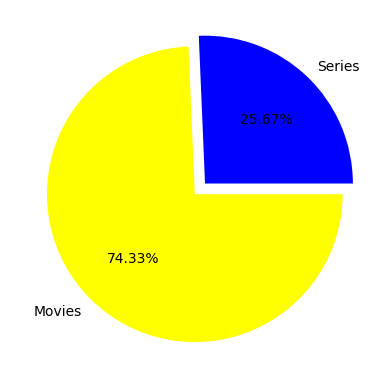

In [22]:

color = ['blue', 'yellow']
label = ['Series', 'Movies']
sizes = [netflix_data[netflix_data['Series or Movie'] == 'Series'].size, netflix_data[netflix_data['Series or Movie'] == 'Movie'].size]
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, explode, label, color, '%2.2f%%')
plt.show()

In [23]:
netflix_data.rename(columns={'View Rating':'ViewerRating'}, inplace=True)

In [24]:
# Language = netflix_data.Languages.str.get_dummies(',')
# Lang = Language.columns.str.strip().values.tolist()
# Language = netflix_data['Languages']
# Language_Count = dict()
# for i in Lang:
#     p = Language.str.count(i).sum()
#     Language_Count[i] = int(p)
# print(len(Language_Count))

language_list = netflix_data['Languages'].dropna().str.split(',')

#dictionary to store the count of lang
Language_Count = {}

# Looping through thr each row & count frequency of each lang
for languages in language_list:
    for language in languages:
        language = language.strip()  
        if language in Language_Count:
            Language_Count[language] += 1
        else:
            Language_Count[language] = 1


print(len(Language_Count))


184


In [25]:
Language_Count = {k: v for k, v in sorted(Language_Count.items(), key=lambda item: item[1], reverse = True)}

top_languages = {"Languages": list(Language_Count.keys()), "Count": list(Language_Count.values())}




In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px


# netflix_data['genre'] = netflix_data['genre'].apply(lambda x: x.split(',')[0])  # For example, take the first genre

# # Now, re-run the plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='genre', y='imdb_score', data=netflix_data)
# plt.xticks(rotation=90)
# plt.title('Genre Distribution by IMDb Ratings')
# plt.xlabel('Genre')
# plt.ylabel('IMDb Score')
# plt.tight_layout()
# plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming netflix_data is already loaded

# Ensure that 'genre' exists and handle missing data
if 'Genre' in netflix_data.columns:
    netflix_data['Genre'] = netflix_data['Genre'].fillna('Unknown').apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')

    # Plotting the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Genre', y='imdb_score', data=netflix_data)
    plt.xticks(rotation=90)
    plt.title('Genre Distribution by IMDb Ratings')
    plt.xlabel('Genre')
    plt.ylabel('IMDb Score')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'genre' does not exist in the dataset.")


ValueError: Could not interpret value `imdb_score` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [29]:
Genres = netflix_data.Genre.str.get_dummies(',')
Genre = Genres.columns.str.strip().values.tolist()
Genres = netflix_data['Genre']
Genre_Count = dict()
for i in Genre:
    p = Genres.str.count(i).sum()
    Genre_Count[i] = int(p)
print(len(Genre_Count))

28


In [30]:
Genre_Count = {k: v for k, v in sorted(Genre_Count.items(), key=lambda item: item[1], reverse = True)}
top_genres = {"Genre": list(Genre_Count.keys()), "Count": list(Genre_Count.values())}

In [31]:
fig = px.bar(pd.DataFrame(top_genres)[:10], y = 'Genre', x = 'Count', orientation = 'h', title = 'Genres with maximum content', color = 'Count', color_continuous_scale = px.colors.qualitative.Prism).update_yaxes(categoryorder = 'total ascending')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

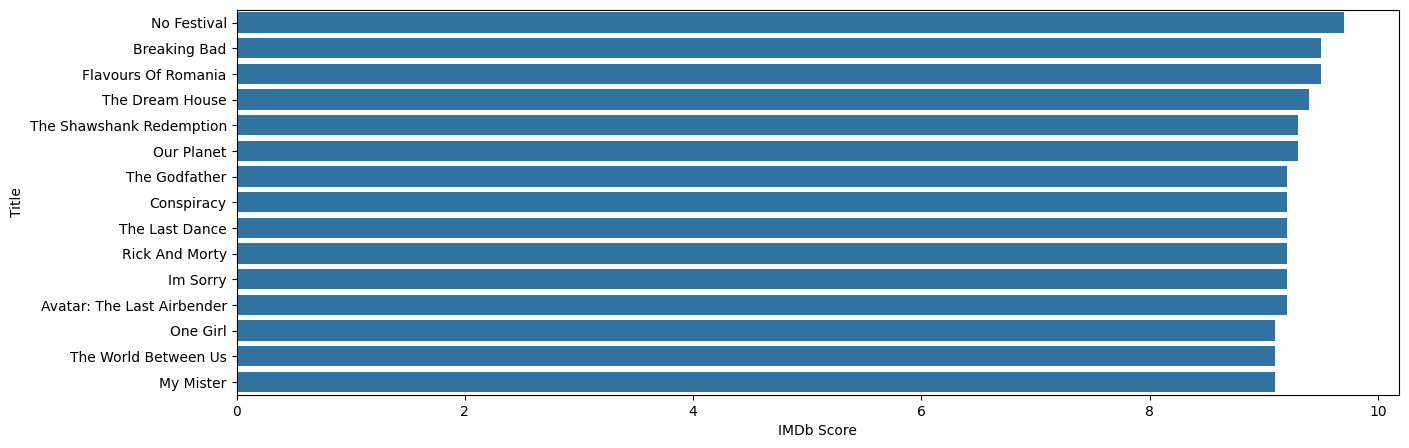

In [32]:
top_15 = netflix_data.sort_values(by = ['IMDb Score'], ascending = False).head(15)
plt.figure(figsize = (15,5))
sns.barplot(data = top_15, y = top_15.index, x = "IMDb Score")
plt.show()

In [33]:
netflix_data = netflix_data[~netflix_data.index.duplicated()]

In [34]:
netflix_data.index.duplicated().sum()

0

In [35]:
netflix_data.index.isnull().sum()

0

In [36]:
netflix_data['Genre'] = netflix_data['Genre'].astype('str')
print((netflix_data['Genre'] == 'nan').sum())

0


In [37]:
netflix_data['Tags'] = netflix_data['Tags'].astype('str')
print((netflix_data['Tags'] == 'nan').sum())

36


In [38]:
print(((netflix_data['Genre'] == 'nan') & (netflix_data['Tags'] == 'nan')).sum())
#so these two features can used to recommend movies as no movie can be left unrecommended

0


In [39]:
print(netflix_data[['IMDb Score']].describe())
netflix_data['IMDb Score'].mode()
#this feature will be used to sort the movie or series list to represent the recommended items

        IMDb Score
count  9125.000000
mean      6.955134
std       0.896501
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


0    6.6
Name: IMDb Score, dtype: float64

In [40]:
netflix_data['IMDb Score'] = netflix_data['IMDb Score'].apply(lambda x: 6.6 if x == 0 or math.isnan(x) else x)
print(netflix_data[['IMDb Score']].describe())
#since no value has suffered for change greater than 0.0003 after replacing the null values with mode value, so we replace the null values with 6.6

        IMDb Score
count  9132.000000
mean      6.954862
std       0.896212
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


In [41]:
netflix_data['Actors'] = netflix_data['Actors'].astype('str')
netflix_data['ViewerRating'] = netflix_data['ViewerRating'].astype('str')

In [42]:
def prepare_data(x):
        return str.lower(x.replace(" ", ""))

In [43]:
new_features = ['Genre', 'Tags', 'Actors', 'ViewerRating']
selected_data = netflix_data[new_features]

In [44]:
for new_feature in new_features:
    selected_data.loc[:, new_feature] = selected_data.loc[:, new_feature].apply(prepare_data)
selected_data.index = selected_data.index.str.lower()
selected_data.index = selected_data.index.str.replace(" ",'')
selected_data.head(2)

,Genre,Tags,Actors,ViewerRating
Title,,,,
letsfightghost,crime,"comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r
howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r


In [45]:
def create_soup(x):
    return x['Genre'] + ' ' + x['Tags'] + ' ' +x['Actors']+' '+ x['ViewerRating']

In [46]:
selected_data.loc[:, 'soup'] = selected_data.apply(create_soup, axis = 1)
selected_data.head(2)

C:\Users\kumaw\AppData\Local\Temp\ipykernel_10952\1181114372.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Genre,Tags,Actors,ViewerRating,soup
Title,,,,,
letsfightghost,crime,"comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime comedyprogrammes,romantictvcomedies,horr..."
howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."


In [47]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(selected_data['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [48]:
selected_data.reset_index(inplace = True)
selected_data.head(2)

,Title,Genre,Tags,Actors,ViewerRating,soup
0,letsfightghost,crime,"comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime comedyprogrammes,romantictvcomedies,horr..."
1,howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."


In [49]:
indices = pd.Series(selected_data.index, index=selected_data['Title'])
indices

Title
letsfightghost                              0
howtobuildagirl                             1
thecon-heartist                             2
glebokawoda                                 3
onlyamother                                 4
                                         ... 
13goingon30                              9127
life2.0                                  9128
brandnewday                              9129
danielarends:blessuretijd                9130
dreamworkshappyholidaysfrommadagascar    9131
Length: 9132, dtype: int64

In [50]:
result = 0
def get_recommendations(title, cosine_sim):
    global result
    title=title.replace(' ','').lower()
    idx = indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 50 most similar movies
    sim_scores = sim_scores[1:51]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    result =  netflix_data.iloc[movie_indices]
    result.reset_index(inplace = True)
    return result

In [51]:
df = pd.DataFrame()
movienames = ['Annabelle Comes Home','The Nun', 'Insidious: The Last Key', 'Conjuring 2', 'Insidious: Chapter 3']
languages = ['English', 'Hindi']
for moviename in movienames:
    get_recommendations(moviename,cosine_sim2)
    for language in languages:
        df = pd.concat([result[result['Languages'].str.count(language) > 0], df], ignore_index=True)
df.drop_duplicates(keep = 'first', inplace = True)
df.sort_values(by = 'IMDb Score', ascending = False, inplace = True)

In [52]:
print(df.shape)
print(df.head())

(126, 22)
             Title   Genre                                               Tags  \
118     The Others  Horror  20th Century Period Pieces,Thrillers,Mysteries...   
145  A Quiet Place   Drama  Horror Movies,Thrillers,Critically-acclaimed M...   
51   The Conjuring  Horror  Horror Films,Thrillers,Supernatural Horror Fil...   
224       Suspiria  Horror  International Movies,Critically-acclaimed Movi...   
45           Split  Horror  Psychological Thrillers,Horror Movies,Thriller...   

                                    Languages  \
118                                   English   
145           American Sign Language, English   
51                             English, Latin   
224  Italian, Russian, English, German, Latin   
45                                    English   

                                  Country Availability   Runtime  \
118  Italy,Sweden,Switzerland,Turkey,Iceland,India,...  1-2 hour   
145                  Iceland,Argentina,Mexico,Colombia  1-2 hour   
51  